# Análisis de PCA de la Temperatura en Canadá
## Reconocimiento de Patrones, Tarea 2
## Equipo: Kathia Rangel Pompa, Juan Carlos Perez Ramirez

In [31]:
# Leemos las mediciones y asignamos los nombres de las estaciones

import pandas as pd

df = pd.read_csv("oef2.data", sep="\s+", header=None)

df.columns = [
    "Ene", "Feb", "Mar",
    "Abr", "May", "Jun",
    "Jul", "Ago", "Sep",
    "Oct", "Nov", "Dic"
]

row_names = [
    "St. John's", "Charlottetown", "Halifax",
    "Sydney", "Yarmouth", "Fredericton",
    "Arvida", "Montreal", "Quebec City",
    "Schefferville", "Sherbrooke", "Kapuskasing",
    "London", "Ottawa", "Thunder Bay",
    "Toronto", "Churchill", "The Pas",
    "Winnipeg", "Prince Albert", "Regina",
    "Beaverlodge", "Calgary", "Edmonton",
    "Kamloops", "Prince George", "Prince Rupert",
    "Vancouver", "Victoria", "Dawson",
    "Whitehorse", "Frobisher Bay", "Inuvik",
    "Resolute", "Yellowknife"
]

df.index = row_names


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, St. John's to Yellowknife
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ene     35 non-null     float64
 1   Feb     35 non-null     float64
 2   Mar     35 non-null     float64
 3   Abr     35 non-null     float64
 4   May     35 non-null     float64
 5   Jun     35 non-null     float64
 6   Jul     35 non-null     float64
 7   Ago     35 non-null     float64
 8   Sep     35 non-null     float64
 9   Oct     35 non-null     float64
 10  Nov     35 non-null     float64
 11  Dic     35 non-null     float64
dtypes: float64(12)
memory usage: 3.6+ KB


In [22]:
# Visualizamos las primeras 5 estaciones

df.head()

,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic
St. John's,-3.9,-4.5,-2.3,1.2,5.4,10.9,15.5,15.3,11.6,6.9,3.4,-1.5
Charlottetown,-7.1,-7.5,-3.1,2.3,8.5,14.5,18.3,17.8,13.5,8.1,2.9,-3.9
Halifax,-6.0,-6.1,-1.6,3.3,9.2,14.8,18.2,18.1,13.8,8.6,3.4,-2.9
Sydney,-4.7,-5.9,-2.5,2.0,7.4,13.2,17.7,17.6,13.5,8.4,3.8,-1.8
Yarmouth,-2.7,-3.2,0.3,4.7,9.2,13.4,16.3,16.4,13.6,9.5,5.2,-0.3


### Aplicamos PCA

(en algunas computadora las componentes aparecen con signos opuestos, la explicacion se hace considerando que en la grafica mes-componente principal la curva de la primera componente esta en los positivos y la de la segunda es convexa)

In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)
df_std = StandardScaler().fit_transform(df)
df_pca = pca.fit_transform(df_std)

l1 = pca.components_[0]
l2 = pca.components_[1]

/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, p

In [24]:
pca.components_

array([[-0.27249278, -0.28401932, -0.30241111, -0.3043605 , -0.29069739,
        -0.26636732, -0.26005611, -0.28434472, -0.30864856, -0.30832476,
        -0.29600351, -0.28126346],
       [ 0.38864197,  0.32068851,  0.17776321, -0.05148195, -0.24656985,
        -0.41940374, -0.44041802, -0.31342729, -0.08632847,  0.04508856,
         0.22103108,  0.35302259]])

Al analizar las primeras dos componentes, se observa que ellas solas explican casi la totalidad de la varianza de los datos (alrededor del 97%)

In [25]:
import numpy as np

def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(zip(a, b, c), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary

pca_summary(pca, df_std)

Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,3.190673,0.848366,0.848366
PC2,1.221363,0.124311,0.972677


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,3.190673,0.848366,0.848366
PC2,1.221363,0.124311,0.972677


### Graficamos los primeros dos componentes

- La primera componente parece indicar temperaturas relativamente constantes a lo largo del año en cada estacion, mostrando poca variabilidad.
- La segunda componente refleja la variabilidad estacional, con valores mas bajos en invierno y mas altos en verano

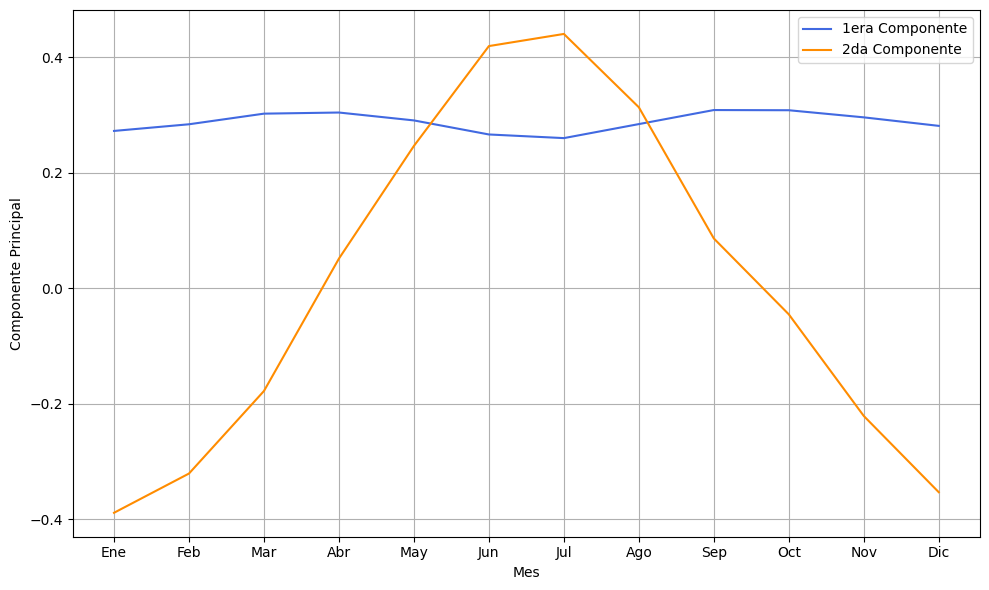

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(df.columns,l1, label='1era Componente', color='royalblue')
plt.plot(df.columns,l2, label='2da Componente', color='darkorange')
plt.legend()
plt.xlabel("Mes")
plt.ylabel("Componente Principal")
plt.grid(True)

plt.tight_layout()
plt.show()

### Agrupamos las estaciones en un biplot

Con las conclusiones anteriores, se deduce que las estaciones que se encuentran mas a la derecha (mayor valor de PC1) experimentan en general temperaturas mas calidas a lo largo del año, mientras que las que se encuentran mas arriba (mayor valor de PC2) experimentan mayor variabilidad de temperatura entre estaciones.

Asi, se observa como Vancouver, Victoria y Prince Rupert (ciudades costeras al sur de Canada) tienden a tener una temperatura generalmente alta y bastante estable; por su parte, ciudades que se encuentran mas al interior del pais (aunque aun al sur), como Quebec, Winnipeg y Edmonton experimentan temperaturas altas pero con diferencias mas notables entre inviernos y veranos. Finalmente, ciudades como Resolute y Frobisher Bay, que se encuentran mucho mas al norte, experimentan temperaturas muy bajas durante todo el año.

Todo lo anterior indica como el clima depende de los diferentes factores geograficos, como la cercania al polo norte y la cercania al mar.

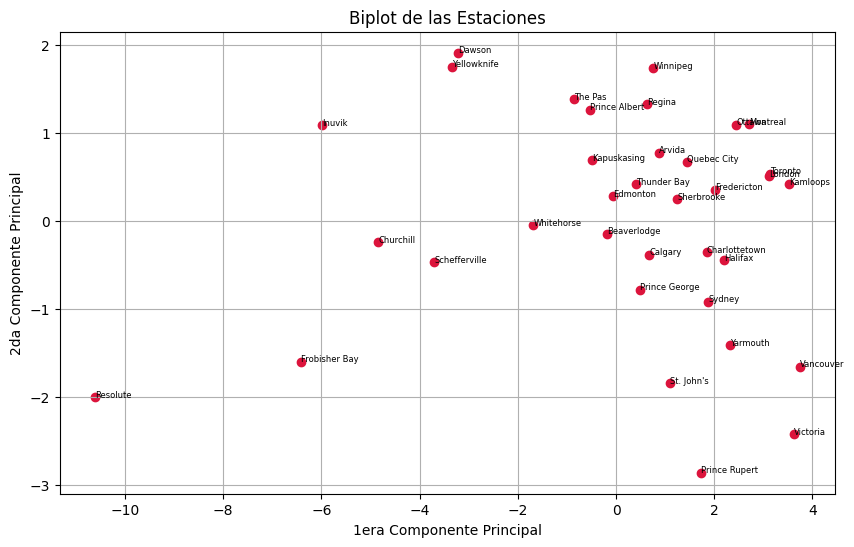

In [30]:
plt.figure(figsize=(10, 6))

plt.scatter(df_pca[:, 0], df_pca[:, 1], color='crimson')

for i, station in enumerate(row_names):
    plt.annotate(station, (df_pca[i, 0], df_pca[i, 1]), fontsize=6)

plt.xlabel("1era Componente Principal")
plt.ylabel("2da Componente Principal")
plt.title("Biplot de las Estaciones")
plt.grid(True)
plt.show()